# Perform sentimental analysis on the Elon-musk tweets

## Import Necessary Libraries

In [159]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
import re
import string
import nltk
from nltk.tokenize import TweetTokenizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.naive_bayes import MultinomialNB, BernoulliNB, CategoricalNB
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.stem import PorterStemmer 
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer 
from nltk.tokenize import word_tokenize, TweetTokenizer
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

## Read the dataset 

In [38]:
data = pd.read_csv('Elon_musk.csv', sep=',', encoding='latin-1')
data.drop('Unnamed: 0', axis=1, inplace=True)
data

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [39]:
#Info of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1999 entries, 0 to 1998
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Text    1999 non-null   object
dtypes: object(1)
memory usage: 15.7+ KB


In [40]:
#Summary of data
data.describe()

,Text
count,1999
unique,1997
top,The most entertaining outcome is the most likely
freq,2


In [41]:
#Chcking the duplicate data
data[data.duplicated()]

,Text
324,The most entertaining outcome is the most likely
655,@westcoastbill Indeed


In [42]:
#Dropping the duplicates
data.drop_duplicates(inplace=True)
data.reset_index(drop='index')

,Text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1992,"@flcnhvy True, it sounds so surreal, but the n..."
1993,@PPathole Make sure to read ur terms &amp; con...
1994,@TeslaGong @PPathole Samwise Gamgee
1995,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [43]:
data.shape

(1997, 1)

In [44]:
dta = data.copy()

## Text  Data Preprocessing  

In [45]:
# remove both the leading and the trailing characters
data = [Text.strip() for Text in data.Text]

In [46]:
# removes empty strings, because they are considered in Python as False
data = [Text for Text in data if Text]
data

['@kunalb11 I\x92m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely',
 '@GiveDirectly Just sent some',
 'Just agree to do Clubhouse with @kanyewest',
 'https://t.co/3rWE9uHSTS',
 '@geoffkeighley @UnrealEngine It\x92s getting real',
 'Bought some Dogecoin for lil X, so he can be a toddler hodler',
 '@JoshManMode He definitely has issues, but the sentencing seems a bit high',
 '@freewalletorg Thanks for fixing',

In [47]:
data = pd.DataFrame(data, columns=['tidy_text'])
data

,tidy_text
0,@kunalb11 Im an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1992,"@flcnhvy True, it sounds so surreal, but the n..."
1993,@PPathole Make sure to read ur terms &amp; con...
1994,@TeslaGong @PPathole Samwise Gamgee
1995,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [48]:
# Joining the list into one string/text
#tweets_text =' '.join(data)
#tweets_text

### Clean The Data

In [49]:
def cleantext(text):
    text = re.sub(r"@[A-Za-z0-9]+", "", str(text)) # Remove Mentions
    text = re.sub(r"#", "", str(text)) # Remove Hashtags Symbol
    text = re.sub(r"RT[\s]+", "", str(text)) # Remove Retweets
    text = re.sub(r"https?:\/\/\S+", "", str(text)) # Remove The Hyper Link
    text = re.sub("[\d]+", "", str(text)) #Removing the strings which contains unnecessary digits in data
    text = text.translate(str.maketrans('','',string.punctuation)) # Remove Punctuations
    text = re.sub("[\W]+", " ", str(text))   #Removing the strings which contains unnecessary digits in data
    text = re.sub('[%s]+' % re.escape(string.punctuation), '', text) 
    text = re.sub('\n', '', text)
    text = re.sub('\W*\d\W*', '', text)
    text = re.sub('^ ', '', text)
    text = str.lower(text)
    
    return text

In [50]:
data['Clean_Tweets'] = data['tidy_text'].apply(lambda x: cleantext(x))
data

,tidy_text,Clean_Tweets
0,@kunalb11 Im an alien,i m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,aacarmack ray tracing on cyberpunk with hdr is...
2,@joerogan @Spotify Great interview!,great interview
3,@gtera27 Doge is underestimated,doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...
...,...,...
1992,"@flcnhvy True, it sounds so surreal, but the n...",true it sounds so surreal but the negative pro...
1993,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms amp conditions befo...
1994,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee
1995,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is ufuf


### Removing stopwords 

In [86]:
my_stop_words = stopwords.words('english')

sw_list = ['rt','ye','yeah','haha','Yes','x', 's', 'ð', 'pron', 'ufuf', 'amp']
my_stop_words.extend(sw_list)
cleaned_tweets = []

for index, row in data.iterrows():
    clean_data = [word for word in row.Clean_Tweets.split() if not word in my_stop_words]
    cleaned_tweets.append(' '.join(clean_data))

data['Fully_clean_tweet'] = cleaned_tweets
data

,tidy_text,Clean_Tweets,Fully_clean_tweet,Sentiment
0,@kunalb11 Im an alien,i m an alien,alien,pos
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,aacarmack ray tracing on cyberpunk with hdr is...,aacarmack ray tracing cyberpunk hdr nextlevel ...,pos
2,@joerogan @Spotify Great interview!,great interview,great interview,pos
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated,neg
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,congratulations tesla china amazing execution ...,pos
...,...,...,...,...
1992,"@flcnhvy True, it sounds so surreal, but the n...",true it sounds so surreal but the negative pro...,true sounds surreal negative propaganda still ...,pos
1993,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms amp conditions befo...,make sure read ur terms conditions clicking ac...,pos
1994,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee,samwise gamgee,pos
1995,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is ufuf,altho dumb dumber,neg


In [87]:
#Checking any null entries
data.isna().sum()

tidy_text            0
Clean_Tweets         0
Fully_clean_tweet    0
Sentiment            0
dtype: int64

### Tokenizing each words

In [88]:
tknz_twt = data['Fully_clean_tweet'].apply(lambda x: x.split())
tknz_twt

0                                                 [alien]
1       [aacarmack, ray, tracing, cyberpunk, hdr, next...
2                                      [great, interview]
3                                  [doge, underestimated]
4       [congratulations, tesla, china, amazing, execu...
                              ...                        
1992    [true, sounds, surreal, negative, propaganda, ...
1993    [make, sure, read, ur, terms, conditions, clic...
1994                                    [samwise, gamgee]
1995                                [altho, dumb, dumber]
1996                           [progress, update, august]
Name: Fully_clean_tweet, Length: 1997, dtype: object

### Lemmatization 

In [89]:
word_lemmatizer = WordNetLemmatizer()

tknz_twt = tknz_twt.apply(lambda x: [word_lemmatizer.lemmatize(i) for i in x])

tknz_twt

0                                                 [alien]
1       [aacarmack, ray, tracing, cyberpunk, hdr, next...
2                                      [great, interview]
3                                  [doge, underestimated]
4       [congratulation, tesla, china, amazing, execut...
                              ...                        
1992    [true, sound, surreal, negative, propaganda, s...
1993    [make, sure, read, ur, term, condition, clicki...
1994                                    [samwise, gamgee]
1995                                [altho, dumb, dumber]
1996                           [progress, update, august]
Name: Fully_clean_tweet, Length: 1997, dtype: object

In [90]:
for i, tokens in enumerate(tknz_twt):
    tknz_twt[i] = ' '.join(tokens)

data['Fully_clean_tweet'] = tknz_twt
data

,tidy_text,Clean_Tweets,Fully_clean_tweet,Sentiment
0,@kunalb11 Im an alien,i m an alien,alien,pos
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,aacarmack ray tracing on cyberpunk with hdr is...,aacarmack ray tracing cyberpunk hdr nextlevel ...,pos
2,@joerogan @Spotify Great interview!,great interview,great interview,pos
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated,neg
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,congratulation tesla china amazing execution l...,pos
...,...,...,...,...
1992,"@flcnhvy True, it sounds so surreal, but the n...",true it sounds so surreal but the negative pro...,true sound surreal negative propaganda still e...,pos
1993,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms amp conditions befo...,make sure read ur term condition clicking accept,pos
1994,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee,samwise gamgee,pos
1995,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is ufuf,altho dumb dumber,neg


### Sentiment Analysis using NLTK Sentiment Intensity Analyze

In [91]:
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

In [92]:
sentiments_using_SIA = data.Fully_clean_tweet.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))

pd.DataFrame(sentiments_using_SIA.value_counts())

,Fully_clean_tweet
pos,1794
neg,203


#### Testing the data by sentiment analysis

In [93]:
data.Clean_Tweets[3]

'doge is underestimated'

#### results of sentiment analysis

In [94]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(data.Fully_clean_tweet[3])

{'neg': 0.677, 'neu': 0.323, 'pos': 0.0, 'compound': -0.2732}

#### Updating into dataframe for further analysis

In [95]:
df = pd.DataFrame()
df['Tweets'] = data.Fully_clean_tweet
df['scores'] = data['Clean_Tweets'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Tweets,scores
0,alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
1,aacarmack ray tracing cyberpunk hdr nextlevel ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp..."
3,doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp..."
4,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp..."


#### Separating the compound scores for sentiment analysis

In [96]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Tweets,scores,compound
0,alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
1,aacarmack ray tracing cyberpunk hdr nextlevel ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249
3,doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732
4,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.8271


#### Making rules for tweets on basis of compound scores

In [97]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Tweets,scores,compound,sentiment
0,alien,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1,aacarmack ray tracing cyberpunk hdr nextlevel ...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,great interview,"{'neg': 0.0, 'neu': 0.196, 'pos': 0.804, 'comp...",0.6249,Positive
3,doge underestimated,"{'neg': 0.512, 'neu': 0.488, 'pos': 0.0, 'comp...",-0.2732,Negative
4,congratulation tesla china amazing execution l...,"{'neg': 0.0, 'neu': 0.645, 'pos': 0.355, 'comp...",0.8271,Positive
...,...,...,...,...
1992,true sound surreal negative propaganda still e...,"{'neg': 0.249, 'neu': 0.561, 'pos': 0.19, 'com...",-0.4215,Negative
1993,make sure read ur term condition clicking accept,"{'neg': 0.0, 'neu': 0.647, 'pos': 0.353, 'comp...",0.5994,Positive
1994,samwise gamgee,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
1995,altho dumb dumber,"{'neg': 0.592, 'neu': 0.408, 'pos': 0.0, 'comp...",-0.7003,Negative


In [98]:
temp = df.groupby('sentiment').count()['Tweets'].reset_index().sort_values(by='Tweets',ascending=False)
temp

,sentiment,Tweets
1,Neutral,887
2,Positive,881
0,Negative,229


#### Applying it to original dataset for final analysis

In [99]:
data['Sentiment'] = sentiments_using_SIA
data

,tidy_text,Clean_Tweets,Fully_clean_tweet,Sentiment
0,@kunalb11 Im an alien,i m an alien,alien,pos
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...,aacarmack ray tracing on cyberpunk with hdr is...,aacarmack ray tracing cyberpunk hdr nextlevel ...,pos
2,@joerogan @Spotify Great interview!,great interview,great interview,pos
3,@gtera27 Doge is underestimated,doge is underestimated,doge underestimated,neg
4,@teslacn Congratulations Tesla China for amazi...,congratulations tesla china for amazing execut...,congratulation tesla china amazing execution l...,pos
...,...,...,...,...
1992,"@flcnhvy True, it sounds so surreal, but the n...",true it sounds so surreal but the negative pro...,true sound surreal negative propaganda still e...,pos
1993,@PPathole Make sure to read ur terms &amp; con...,make sure to read ur terms amp conditions befo...,make sure read ur term condition clicking accept,pos
1994,@TeslaGong @PPathole Samwise Gamgee,samwise gamgee,samwise gamgee,pos
1995,@PPathole Altho Dumb and Dumber is <U+0001F525...,altho dumb and dumber is ufuf,altho dumb dumber,neg


#### From above analysis, nltk sentiment analysis better and gives good results.

### Word Cloud Analysis

#### Positive words

In [100]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

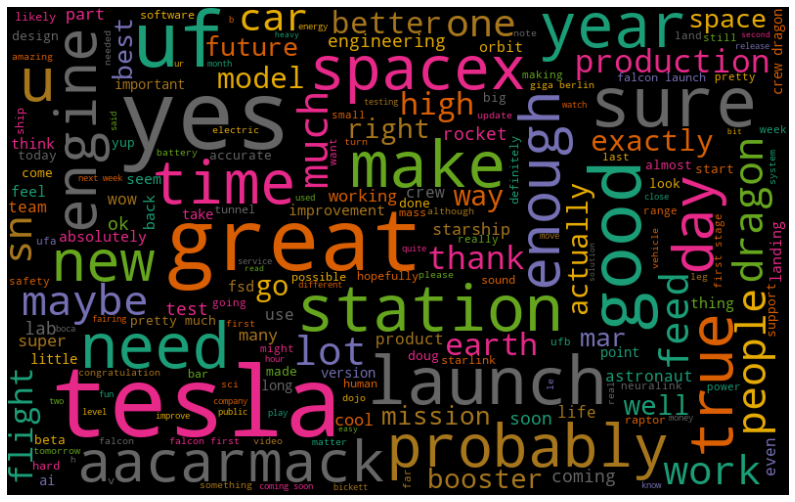

In [101]:
all_words = ' '.join([text for text in data['Fully_clean_tweet'][data.Sentiment == 'pos']])
generate_wordcloud(all_words)

#### Negative words

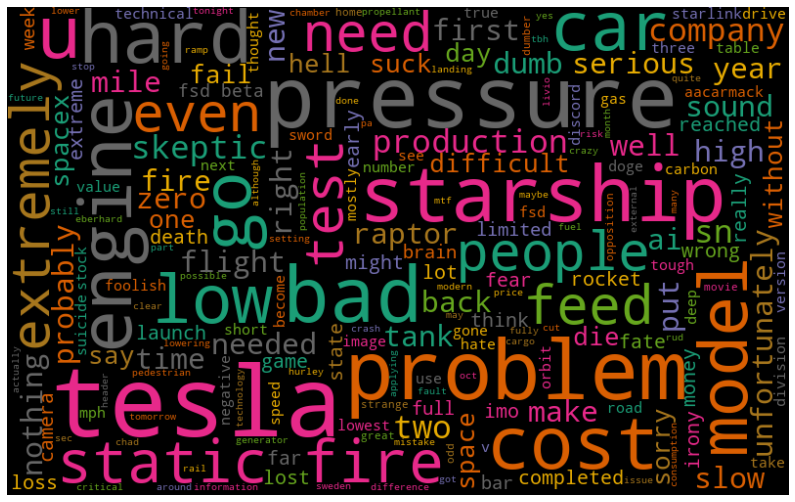

In [102]:
all_words = ' '.join([text for text in data['Fully_clean_tweet'][data.Sentiment == 'neg']])
generate_wordcloud(all_words)

### Model Building for Sentiment Analysis

#### Feature Extraction

In [140]:
# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.9, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(data['Fully_clean_tweet'])

#### Splitting the target variable 

In [141]:
target_variable = data['Sentiment'].apply(lambda x: 1 if x=='pos' else 0)

In [142]:
target_variable.value_counts()

1    1794
0     203
Name: Sentiment, dtype: int64

#### Model Building & Training

In [143]:
X_train, X_test, y_train, y_test = train_test_split(tfidf_word_feature, target_variable, test_size=0.3, random_state=0, stratify=target_variable)

In [144]:
nb = MultinomialNB()
model = nb.fit(X_train, y_train)

#### Model Testing & Evaluation

In [145]:
y_pred = model.predict(X_test)

In [146]:
accuracy_score(y_test, y_pred)

0.8983333333333333

In [147]:
confusion_matrix(y_test, y_pred)

array([[  0,  61],
       [  0, 539]], dtype=int64)

In [148]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        61
           1       0.90      1.00      0.95       539

    accuracy                           0.90       600
   macro avg       0.45      0.50      0.47       600
weighted avg       0.81      0.90      0.85       600



#### From above model, score is good but there is misclassification for class 0. Hence, we will try and analyse with another model of naive_bayes

In [149]:
model1 = BernoulliNB()

In [150]:
model1.fit(X_train, y_train)

BernoulliNB()

In [151]:
y_pred = model1.predict(X_test)

In [152]:
accuracy_score(y_test, y_pred)

0.895

In [177]:
confusion_matrix(y_test, y_pred)

array([[  5,  56],
       [  7, 532]], dtype=int64)

In [178]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.42      0.08      0.14        61
           1       0.90      0.99      0.94       539

    accuracy                           0.90       600
   macro avg       0.66      0.53      0.54       600
weighted avg       0.86      0.90      0.86       600



#### Here, we can see there is a little improvement in missclassifcations. 

# Hence, we can conclude that Elon Musk tweets are 'positive' from above analysis. 

# ================================================ 